In [129]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

In [130]:
df_DA_explode = df_DA.explode("job_skills").copy()
df_DA_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}"
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin..."
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",excel,"{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ..."
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ..."


In [144]:
skill_stats = df_DA_explode.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    salary_avg=('salary_year_avg', 'mean')
).sort_values('skill_count', ascending=False)

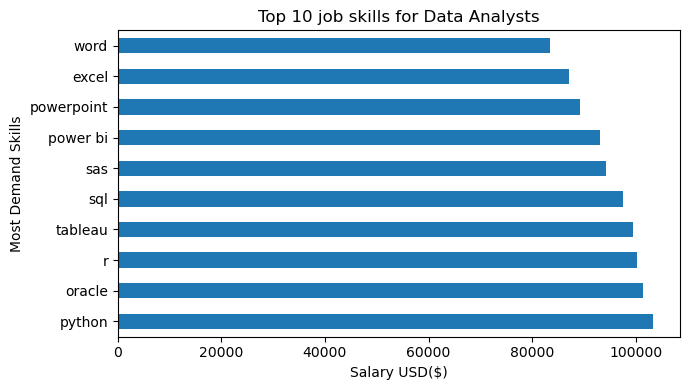

In [146]:
skill_stats = skill_stats.sort_values(by='salary_avg',ascending=False).head(10)
skill_stats.plot(kind='barh', y="salary_avg", title="Top 10 job skills for Data Analysts", figsize=(7, 4))
plt.xlabel("Salary USD($)")
plt.ylabel("Most Demand Skills")
plt.tight_layout()
plt.legend().set_visible(False)
plt.show()


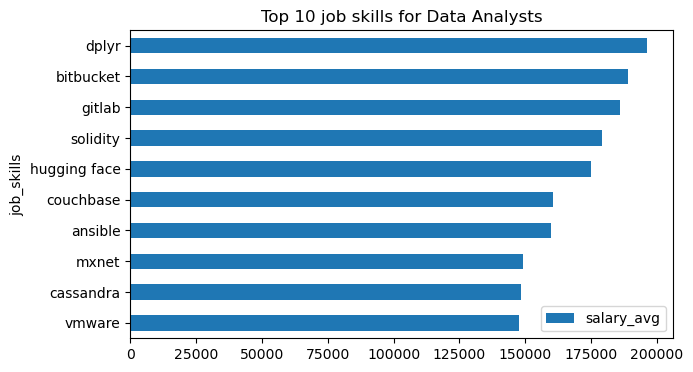

In [147]:
skill_stats1 = df_DA_explode.groupby("job_skills").agg(
    skill_count = ("job_skills", "count"),
    salary_avg = ("salary_year_avg", "median")
)
skill_stats1 = skill_stats1.sort_values(by="salary_avg",ascending=False).head(10)
skill_stats1.plot(kind="barh", y="salary_avg", title="Top 10 job skills for Data Analysts", figsize=(7, 4))
plt.gca().invert_yaxis() 

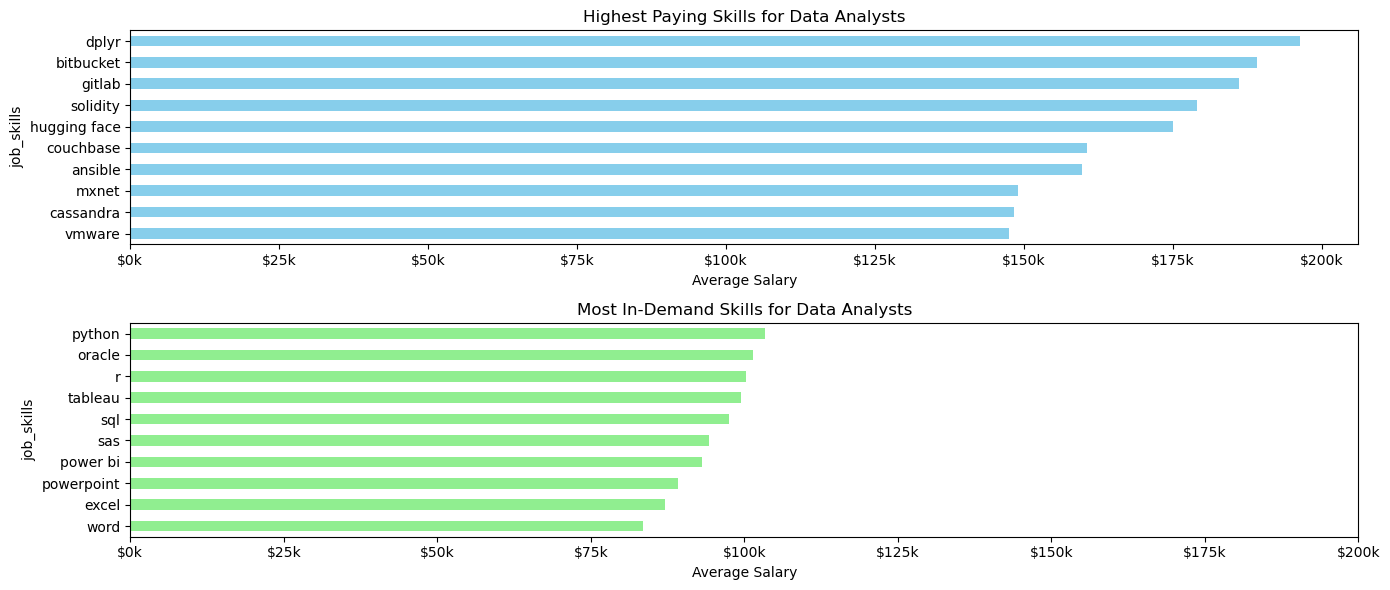

In [161]:

# Assuming:
# skill_stats1: DataFrame for top 10 highest paying skills
# skill_stats2: DataFrame for most in-demand skills (with skill_count and salary_avg)

fig, ax = plt.subplots(2, 1, figsize=(14, 6))

# First plot: Highest paying skills
skill_stats1.plot(kind="barh", y="salary_avg",color="skyblue", ax=ax[0], legend=False)
ax[0].set_title("Highest Paying Skills for Data Analysts")
ax[0].set_xlabel("Average Salary")
ax[0].invert_yaxis()  # highest on top
ax[0].set_xlim(ax[0].get_xlim())
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f"${int(x/1000)}k"))

# Second plot: Most in-demand skills
skill_stats.plot(kind="barh", y="salary_avg",color="lightgreen", ax=ax[1], legend=False)
ax[1].set_title("Most In-Demand Skills for Data Analysts")
ax[1].set_xlabel("Average Salary")
ax[1].invert_yaxis()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f"${int(x/1000)}k"))
ax[1].set_xlim(0, 200000)


plt.tight_layout()
plt.show()
